In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
warnings.filterwarnings('ignore')

In [176]:
df=pd.read_csv('intrusion_dataset.txt')
df.shape


(1244, 42)

In [177]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [178]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [179]:
print(df.shape)

(1244, 42)


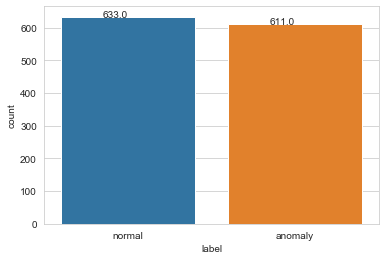

In [180]:
sns.set_style('whitegrid')
ax=sns.countplot(x='label',data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [181]:
print(df.shape)

(1244, 42)


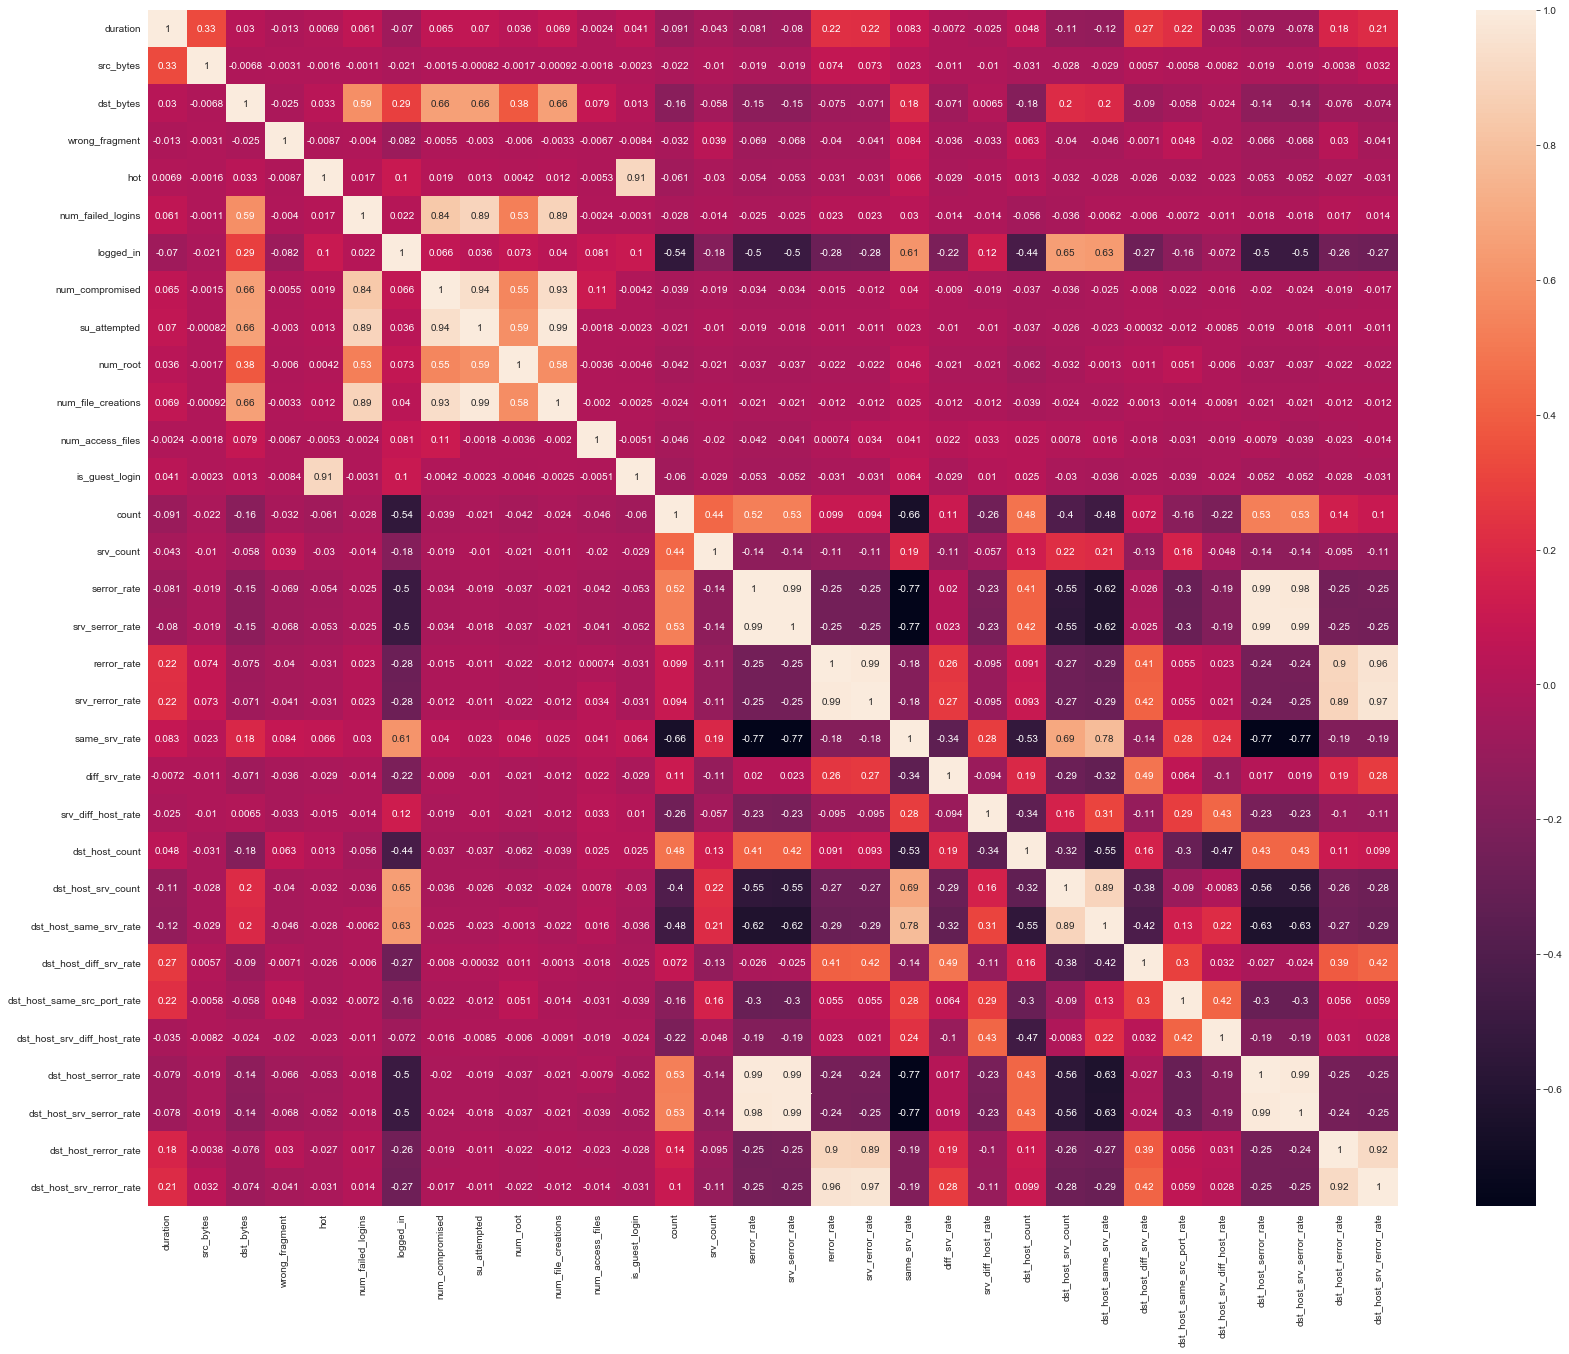

In [182]:
df = df[[col for col in df if df[col].nunique()>1]]
plt.figure(figsize =(28, 22))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [183]:
print(df.shape)

(1244, 36)


In [184]:
# This variable is highly correlated with num_file_creations and should be ignored for analysis.
#(Correlation = 0.99)
df.drop('su_attempted', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.99)
df.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.99)
df.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.99)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.99)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
#df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.99)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.99)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)



In [185]:
service = {'aol': 1, 'auth': 2, 'bgp': 3, 'courier': 4, 'csnet_ns': 5, 'ctf': 6, 'daytime': 7, 'discard': 8,
                 'domain': 9, 'domain_u': 10, 'echo': 11, 'eco_i': 12, 'ecr_i': 13, 'efs': 14, 'exec': 15,
                 'finger': 16, 'ftp': 17, 'ftp_data': 18, 'gopher': 19, 'harvest': 20, 'hostnames': 21, 'http': 22,
                 'http_2784': 23, 'http_443': 24, 'http_8001': 25, 'imap4': 26, 'IRC': 27, 'iso_tsap': 28,
                 'klogin': 29, 'kshell': 30, 'ldap': 31, 'link': 32, 'login': 33, 'mtp': 34, 'name': 35,
                 'netbios_dgm': 36, 'netbios_ns': 37, 'netbios_ssn': 38, 'netstat': 39, 'nnsp': 40, 'nntp': 41,
                 'ntp_u': 42, 'other': 43, 'pm_dump': 44, 'pop_2': 45, 'pop_3': 46, 'printer': 47, 'private': 48,
                 'red_i': 49, 'remote_job': 50, 'rje': 51, 'shell': 52, 'smtp': 53, 'sql_net': 54, 'ssh': 55,
                 'sunrpc': 56, 'supdup': 57, 'systat': 58, 'telnet': 59, 'tftp_u': 60, 'tim_i': 61, 'time': 62,
                 'urh_i': 63, 'urp_i': 64, 'uucp': 65, 'uucp_path': 66, 'vmnet': 67, 'whois': 68, 'X11': 69,
                 'Z39_50': 70}
flag = {'SF': 0, 'S0': 1, 'REJ': 2, 'RSTR': 3, 'RSTO': 4, 'S1': 5, 'SH': 6, 'S2': 7, 'RSTOS0': 8, 'S3': 9,'OTH': 10}
protocol_type = {'tcp': 0, 'udp': 1, 'icmp': 2}
attack_types={'normal': 0, 'anomaly':1}

In [186]:
df.service = [service[item] for item in df.service]

In [187]:
df.protocol_type = [protocol_type[item] for item in df.protocol_type]

In [188]:
df.flag = [flag[item] for item in df.flag]

In [189]:
df.label= [attack_types[item] for item in df.label]

In [190]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,label
0,0,0,18,0,491,0,0,0,0,0,...,1.00,0.00,0.00,150,25,0.03,0.17,0.00,0.05,0
1,0,1,43,0,146,0,0,0,0,0,...,0.08,0.15,0.00,255,1,0.60,0.88,0.00,0.00,0
2,0,0,48,1,0,0,0,0,0,0,...,0.05,0.07,0.00,255,26,0.05,0.00,0.00,0.00,1
3,0,0,22,0,232,8153,0,0,0,1,...,1.00,0.00,0.00,30,255,0.00,0.03,0.04,0.00,0
4,0,0,22,0,199,420,0,0,0,1,...,1.00,0.00,0.09,255,255,0.00,0.00,0.00,0.00,0


In [191]:
Y = df['label']
X = df.drop(['label'], axis = 1)

In [192]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
1239    0
1240    0
1241    0
1242    0
1243    0
Name: label, Length: 1244, dtype: int64

In [193]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate
0,0,0,18,0,491,0,0,0,0,0,...,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,0.05
1,0,1,43,0,146,0,0,0,0,0,...,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,0.00
2,0,0,48,1,0,0,0,0,0,0,...,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,0.00
3,0,0,22,0,232,8153,0,0,0,1,...,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,0.00
4,0,0,22,0,199,420,0,0,0,1,...,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,0.00


In [194]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=100)

In [195]:
from sklearn import preprocessing
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)

Accuracy :  0.9278074866310161


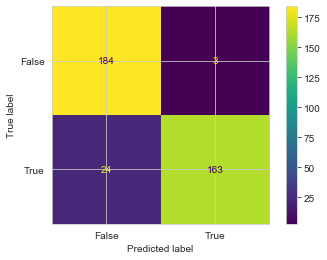

In [214]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print("Accuracy : ",rf.score(X_test,y_test))
rf_predict=rf.predict(X_test);
confusion_matrix=metrics.confusion_matrix(y_test,rf_predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()

Accuracy :  0.7914438502673797



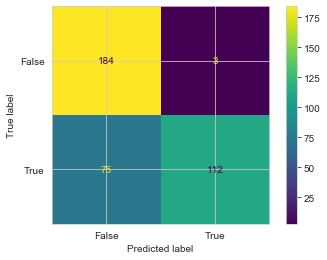

In [197]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",max_depth=4)
dtc.fit(X_train,y_train)
print("Accuracy : ",dtc.score(X_test,y_test))
print()
dtc_predict=dtc.predict(X_test);
confusion_matrix=metrics.confusion_matrix(y_test,dtc_predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()

In [198]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,31):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

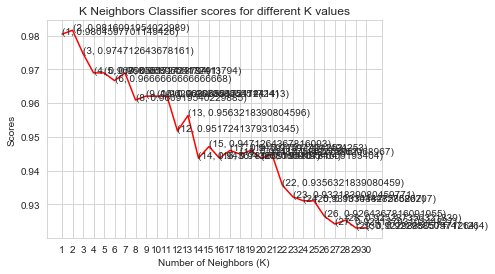

In [199]:
plt.plot([k for k in range(1, 31)], knn_scores, color = 'red')
for i in range(1,31):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 31)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

Accuracy :  0.9240580847723707



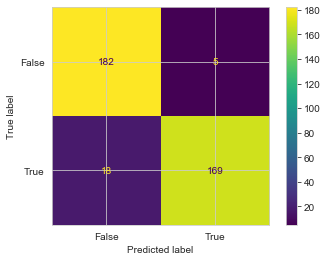

In [200]:
knn_classifier = KNeighborsClassifier(n_neighbors = 28)
score=cross_val_score(knn_classifier,X_test,y_test,cv=28)
print("Accuracy : ",score.mean())
print()
knn_classifier.fit(X_test,y_test)
knn_predict=knn_classifier.predict(X_test);
confusion_matrix=metrics.confusion_matrix(y_test,knn_predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()

Accuracy :  0.9545454545454546



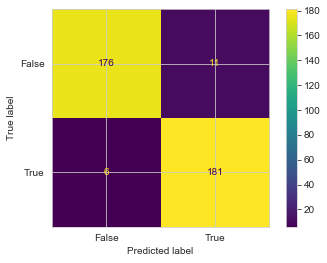

In [201]:
from sklearn.svm import SVC
nsv=SVC(kernel='linear',gamma=0.01,C=0.005)
nsv.fit(X_train,y_train)
nsv_predict=nsv.predict(X_test);
print("Accuracy : ",accuracy_score(y_test,nsv_predict))
print()
confusion_matrix=metrics.confusion_matrix(y_test,nsv_predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()
pickle.dump(nsv,open('model.pkl','wb'))


Epoch 1/43
32/32 [==============================] - 0s 1ms/step - loss: 0.6461 - accuracy: 0.5621
Epoch 2/43
32/32 [==============================] - 0s 1ms/step - loss: 0.5467 - accuracy: 0.6954
Epoch 3/43
32/32 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.8575
Epoch 4/43
32/32 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8897
Epoch 5/43
32/32 [==============================] - 0s 1ms/step - loss: 0.3629 - accuracy: 0.8977
Epoch 6/43
32/32 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.9069
Epoch 7/43
32/32 [==============================] - 0s 1ms/step - loss: 0.2743 - accuracy: 0.9172
Epoch 8/43
32/32 [==============================] - 0s 1ms/step - loss: 0.2432 - accuracy: 0.9230
Epoch 9/43
32/32 [==============================] - 0s 1ms/step - loss: 0.2197 - accuracy: 0.9287
Epoch 10/43
32/32 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9322
Epoch 11/43
32/32 [

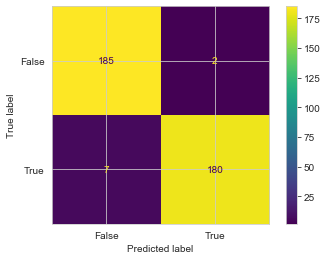

[[185   2]
 [  7 180]]


In [202]:
ann = Sequential()
ann.add(Dense(6, input_dim=(len(X.columns)), activation='relu'))
ann.add(Dense(1,activation='sigmoid'))
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=43, batch_size=len(X.columns))
_, ann_acc = ann.evaluate(X_train, y_train)
y_predict=ann.predict(X_test)
y_predict=(y_predict>0.5)
print("Accuracy : ",ann_acc)
confusion_matrix=metrics.confusion_matrix(y_test,y_predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()
print(confusion_matrix)
ann.save('./model.h5')

In [203]:
print(X.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'num_root', 'num_file_creations', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_rerror_rate'],
      dtype='object')
